In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

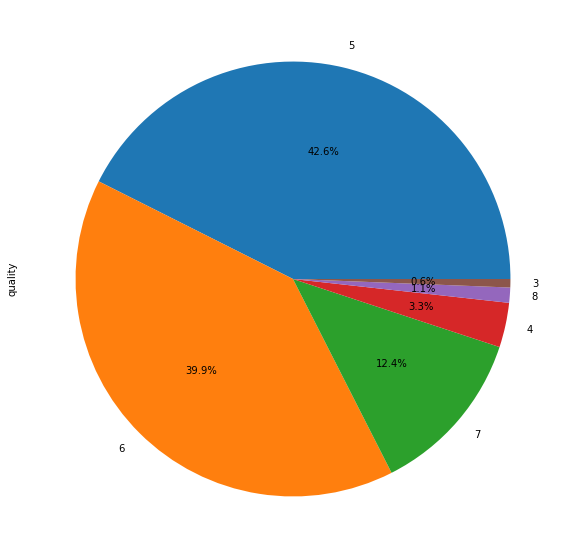

In [10]:
plt.figure(figsize=(10,10))
data['quality'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
def histo_plots(data, variable, target):
    plt.figure(figsize=(10,4))
    sns.histplot(data[variable], bins=30, color='teal')


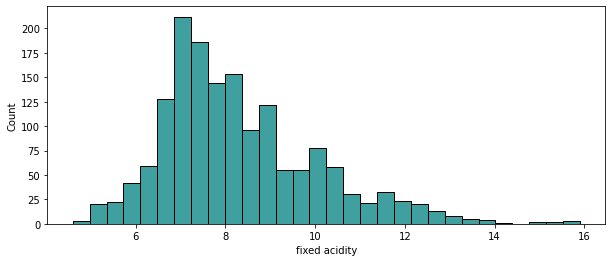

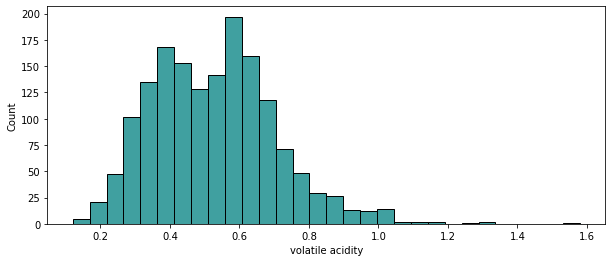

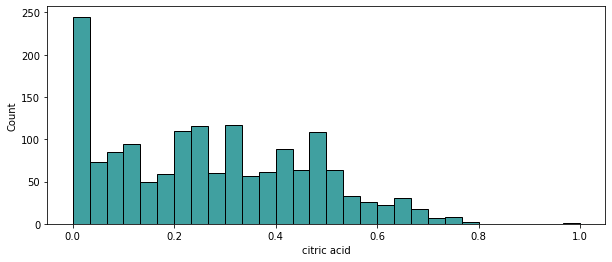

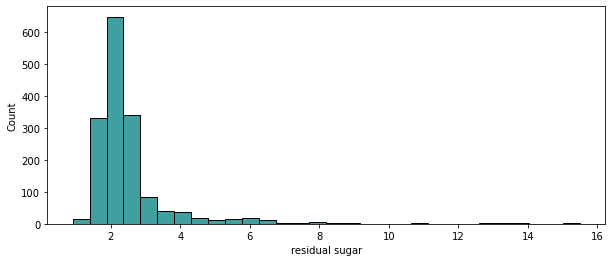

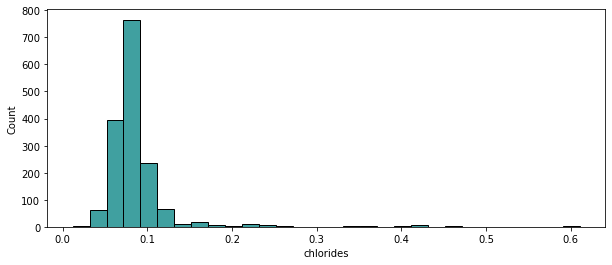

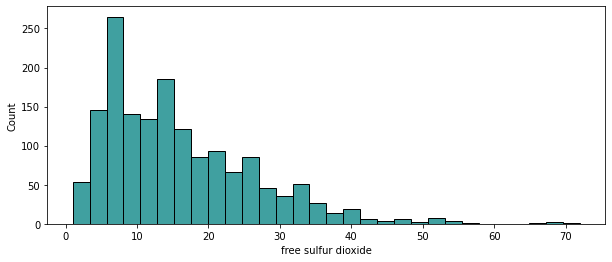

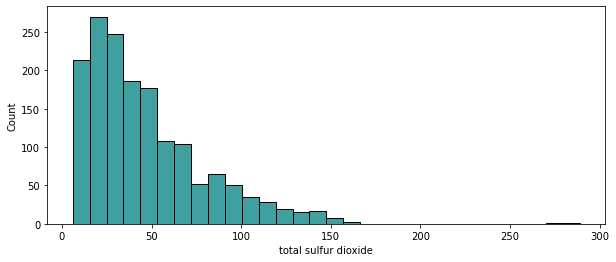

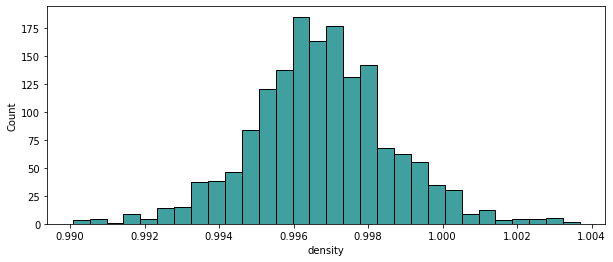

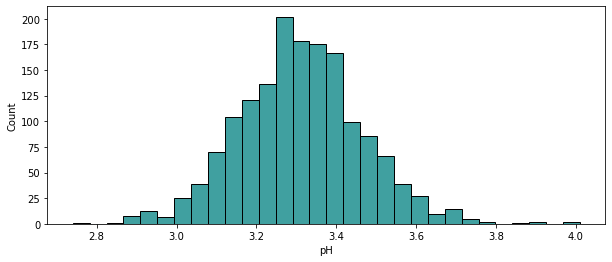

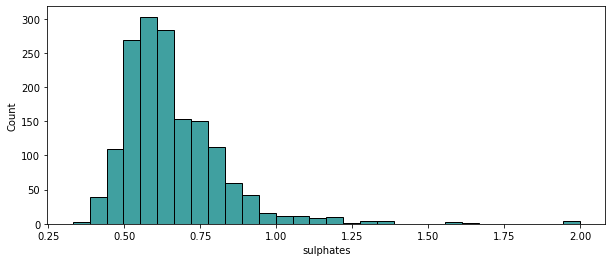

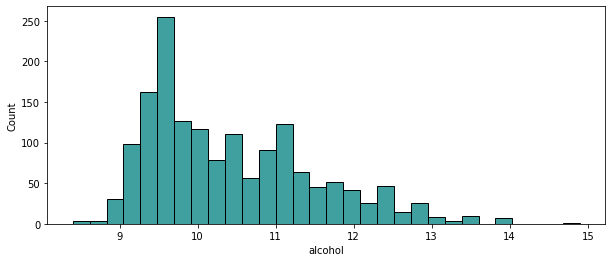

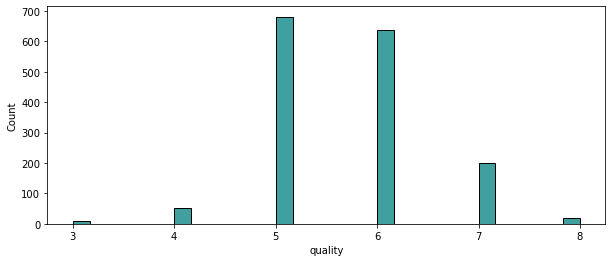

In [14]:
for variable in data: 
    histo_plots(data, variable, "quality")

<AxesSubplot:>

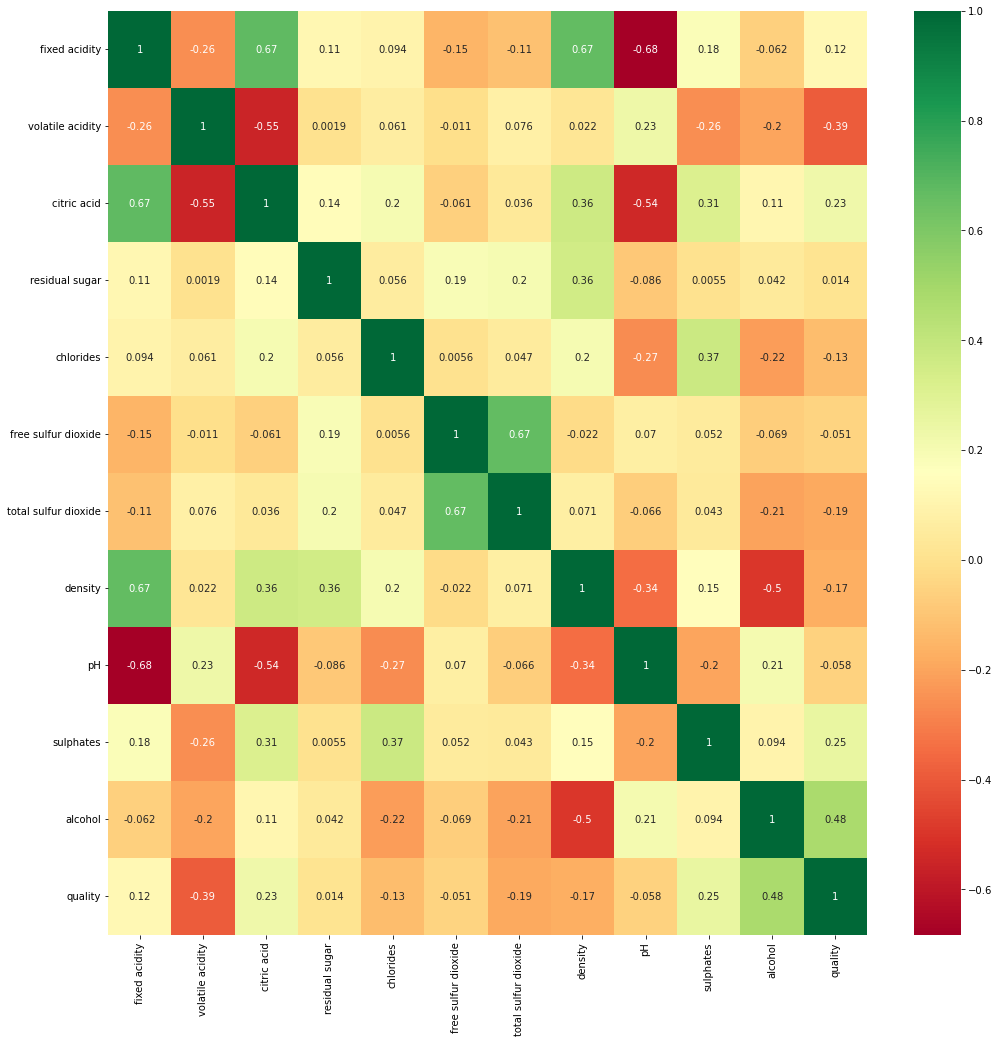

In [15]:
corr = data.corr()
plt.figure(figsize=(17,17))
sns.heatmap(corr, annot=True, cmap="RdYlGn")

In [16]:
y = data['quality']
X = data.drop('quality',axis=1)

In [17]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


# Clustering

In [19]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [20]:
kmeans.cluster_centers_

array([[ 0.08183134,  0.01795477,  1.14417813, -0.39939594,  5.60473128,
        -0.070479  ,  0.47441556,  0.18580277, -1.68735655,  3.72060836,
        -0.88256287],
       [-0.48696755,  0.6892084 , -0.8341319 , -0.18586636, -0.06251173,
        -0.42106843, -0.41541806, -0.06560038,  0.43284333, -0.39253476,
        -0.40728641],
       [-0.67150861, -0.45938316, -0.11168736, -0.25972443, -0.41316397,
         0.0893997 , -0.24449366, -1.25228444,  0.60537359,  0.15656932,
         1.31727255],
       [-0.18863726, -0.05158305,  0.40021232,  4.24475937,  0.20631777,
         1.58986899,  1.7422233 ,  1.03540201, -0.19454835,  0.08533204,
        -0.31541892],
       [-0.06890727,  0.04194789,  0.05710273, -0.10474579, -0.0351784 ,
         0.98974297,  1.17837091,  0.21479702, -0.13485836, -0.19509146,
        -0.58173251],
       [ 1.35641943, -0.67519373,  1.13083389,  0.07642658, -0.01180496,
        -0.56607354, -0.53734379,  0.78370695, -0.85437832,  0.32238215,
         0.167

In [21]:
clusters=kmeans.predict(X)
clusters

array([1, 1, 1, ..., 2, 1, 2])

In [22]:
pca = PCA(n_components=2)

reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1","PC2"])
reduced_X

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [23]:
reduced_X['cluster']=clusters
reduced_X

,PC1,PC2,cluster
0,-1.619530,0.450950,1
1,-0.799170,1.856553,1
2,-0.748479,0.882039,1
3,2.357673,-0.269976,5
4,-1.619530,0.450950,1
...,...,...,...
1594,-2.150500,0.814286,1
1595,-2.214496,0.893101,2
1596,-1.456129,0.311746,2
1597,-2.270518,0.979791,1


In [24]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

C:\Users\sarav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 3.52834398,  1.01049765],
       [-1.08942017,  0.01687175],
       [-1.27708156, -1.06332618],
       [ 1.30422908,  3.29919581],
       [ 0.11450946,  1.43738481],
       [ 2.10942083, -0.98427426]])

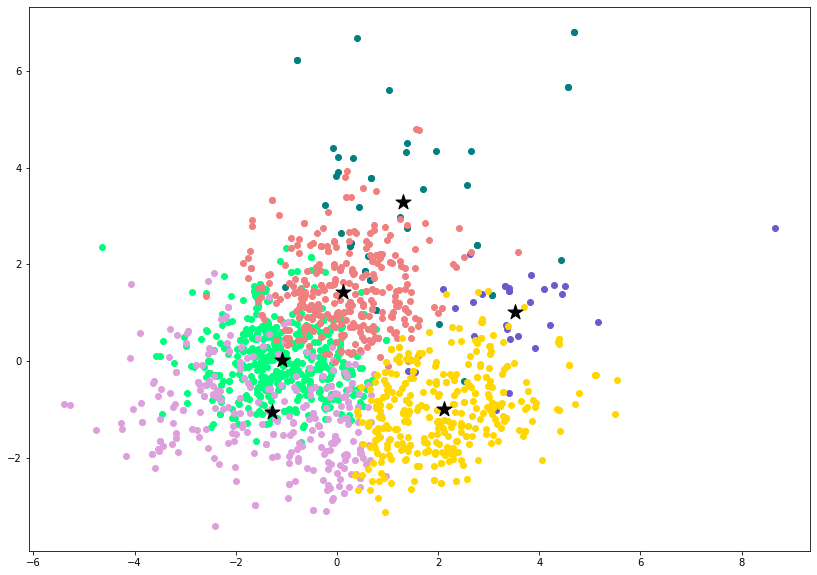

In [25]:
plt.figure(figsize=(14,10))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:,'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:,"PC2"], color='slateblue')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:,'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:,"PC2"], color='springgreen')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:,'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:,"PC2"], color='plum')
plt.scatter(reduced_X[reduced_X['cluster'] == 3].loc[:,'PC1'], reduced_X[reduced_X['cluster'] == 3].loc[:,"PC2"], color='teal')
plt.scatter(reduced_X[reduced_X['cluster'] == 4].loc[:,'PC1'], reduced_X[reduced_X['cluster'] == 4].loc[:,"PC2"], color='lightcoral')
plt.scatter(reduced_X[reduced_X['cluster'] == 5].loc[:,'PC1'], reduced_X[reduced_X['cluster'] == 5].loc[:,"PC2"], color='gold')

plt.scatter(reduced_centers[:,0], reduced_centers[:,1],color="black", marker='*',s=250)

# Training

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape

(1279, 11)

In [28]:
X_test.shape

(320, 11)

In [29]:
y_train.shape

(1279,)

In [30]:
y_test.shape

(320,)

In [33]:
logreg = LogisticRegression(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier()
svc = SVC(random_state=0)
mlp = MLPClassifier()

In [34]:
models = [
    ("Logistic regression", logreg),
    ("Decision Tree Classifier", dtc),
    ("Random Forest Classifier", rfc),
    ("KNeighborsClassifier", knn),
    ("SVC", svc),
    ("MLPClassifier", mlp)
]

In [42]:
for name, model in models:
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    
    print(name," score : ", acc*100,"%")

C:\Users\sarav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression  score :  58.75 %
Decision Tree Classifier  score :  60.9375 %
Random Forest Classifier  score :  69.375 %
KNeighborsClassifier  score :  55.625 %
SVC  score :  61.875 %
MLPClassifier  score :  57.8125 %


C:\Users\sarav\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
import pickle
file = open('wine-quality.pkl','wb')
pickle.dump(rfc,file)